In [1]:
 using Plots, PlotRecipes
pyplot()
using LaTeXStrings;
using TaylorSeries

    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/usuario/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.DataArray, AbstractArray) at /Users/usuario/.julia/v0.4/DataArrays/src/operators.jl:276.
To fix, define 
    +(DataArrays.DataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.
    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/usuario/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.AbstractDataArray, AbstractArray) at /Users/usuario/.julia/v0.4/DataArrays/src/operators.jl:300.
To fix, define 
    +(DataArrays.AbstractDataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.


# Mapeo de Hénon

## Mapeos en 2D
### Estabilidad de puntos fijos, órbitas periódicas y atractores extraños.

Un mapeo en dos dimensiones se puede caracterizar, al igual que un mapeo en una dimensión, con la estabilidad de sus puntos fijos, sus órbitas periódicas y otras propiedades que dependen de los parámetros del mapeo. 

Sea $f(\vec{x},\alpha)$ un mapeo en dos dimensiones, con $ \vec{x}=(x,y)$  y $\alpha$ un conjunto de parámetros de los que depende el mapeo.

Los puntos fijos serán aquellos que satisfagan

$$f(\vec{x}^*,\alpha)=\vec{x}^*$$

Para mapeos lineales de la forma 

$$f(\vec{x})=A\vec{x}$$  (con A una matriz de $2\times2$) se tiene que sus puntos fijos son los que satisfacen 

$$A\vec{x}^*=\vec{x}^*$$

ó bien 

$$ (A-I)\vec{x}^*=0$$

Si $(A-I)$ es no singular, entonces $\vec{x}^*$ es el unico punto de equilibrio del sistema, pero si $(A-I)$ es singular, hay una familia de puntos de equlibrio. En tal caso se define

$$\vec{y}=\vec{x}-\vec{x}^*$$ 

y se obtiene un nuevo mapeo 

$$f_y(\vec{y})=A\vec{y}$$ 
cuyos puntos de equlibrio satisfacen

$$\vec{y}^*=A\vec{y}^*$$

Así las ropiedades de estabilidad de un punto de equilibrio $\vec{x}^*\neq 0 $son las mismas que las de un punto de equilibrio $\vec{x}=0$. Sea

$$J=P^{-1}AP$$

la forma canónica de Jordan de A. Sea también 

$$\vec{y}=P^{-1}\vec{x}$$

Entonces el sistema original se transforma a 

$$f_y(\vec{y})=J\vec{y}$$ 


Hay tre posibles formas canónicas de Jordan que se pueden tener, como vimos en clase. Estas formas son:
\begin{equation*}
\left( 
\begin{array}{cc}
\alpha & -\beta \\
\beta & \alpha 
\end{array} 
\right), 
\left( 
\begin{array}{cc}
\lambda & 1 \\
0 & \lambda 
\end{array} 
\right),
\left( 
\begin{array}{cc}
\lambda & 0 \\
0 & \mu
\end{array} 
\right),
\end{equation*}
donde $\alpha, \beta, \lambda$ y $\mu$ son reales, con $\beta\ne 0$ y $\mu\ne\lambda$. En esta forma, los elementos de la diagonal son los eigenvalores, excepto para la primer matriz, cuyos eigenvalores son $\alpha\pm i \beta$.

Para el caso general en que el mapeo $f(\vec{x},\alpha)$ no es lineal, se puede linealizar con la matriz jacbiana $J_b$ y así estudiar localmente el comportamiento alrededor de los puntos fijos del mapeo.

El caso que más nos interesa es cuando se tiene dos eigenvalores reales distintos para estduiar al **mapeo de Hénon** que  está definido por 

$$ \begin{array}{cc}
x_{n+1}=& 1-ax^2_n+y_n \\
y_{n+1}= & bx_n 
\end{array} $$

Cuando se tienen dos eigenvalores reales distintos, los puntos fijos pueden ser:

- Puntos fijos aasíntoticamente estables: $\lambda_1\lt\lambda_2\lt1$
- Puntos fijos  inestables: $\lambda_1\gt\lambda_2\gt1$
- Puntos fijos silla: $0 \lt \lambda_1 \lt 1, \lambda_2\gt1$
- Puntos fijos degenerados: $\lambda_1=1, \lambda_1 \gt \lambda_2$
- Punto fijo estable:$-1\lt\lambda_1\lt 0 \lt\lambda_2\lt1$
- Punto fijo estable: $-1\lt\lambda_1\lt\lambda_2\lt0$
- Punto fijo silla: $\lambda_1\lt -1 \lt \lambda_2 \lt 0$
- Punto fijo silla: $\lambda_1\lt -1$ y  $ 0\lt\lambda_2 \lt 1$
- Punto fijo silla: $-1\lt\lambda_1\lt 0$ y  $ 1\lt\lambda_2$

Nota: Los puntos fijos silla son inestables.

La matriz jacobiana del mapeo de Hénon es:

\begin{equation*}
J_b=\left( 
\begin{array}{cc}
-2ax & 1 \\
b & 0 
\end{array} 
\right)
\end{equation*}

Sus eigenvalores están dados por 

$$\lambda_{\pm}=-ax\pm\sqrt{(ax)^2+b}$$

Los puntos fijos del mapeo de Hénon están dados por 

$$x=\frac{(1-b)}{2a}\pm 1/2\sqrt{(1-b)^2+4a}$$

$$y=bx$$

Por lo que existen dos puntos fijos en el plano $XY$ para cuando 

$$a\gt-1/4(1-b)^2$$

y un solo punto fijo en el plano $XY$ si
$$a=-1/4(1-b)^2$$

Escribamos algunas funciones que nos permitirán estudiar la estabilidad de los puntos fijos del mapeo de Hénon.

In [2]:
"""Función que define el mapeo de Henon en 2D"""
function Henon_map(x,y,a,b)
    fx=y+1-a*x^2
    fy=b*x
    return fx,fy
end 

Henon_map (generic function with 1 method)

In [3]:
function Fixed_points(a,b)
    xf1=-(1-b)/(2a)+(1/2a)*sqrt((1-b)^2+4a)
    xf2=-(1-b)/(2a)-(1/2a)*sqrt((1-b)^2+4a)
    yf1=b*xf1
    yf2=b*xf2
    return (xf1,yf1),(xf2,yf2)
end 

Fixed_points (generic function with 1 method)

In [4]:
function Jacobian_henon(x,y,a,b)
    Df=[[-2a*x,b] [1,0]]
    return Df
end 

Jacobian_henon (generic function with 1 method)

In [9]:
function EigenVals_JacHen(x,y,a,b)
    λ₁=-a*x+sqrt((a*x)^2+b)
    λ₂=-a*x-sqrt((a*x)^2+b)
    return λ₁,λ₂
end 

EigenVals_JacHen (generic function with 1 method)

Comencemos estudiando el mapeo "clásico" de Hénon que corresponde a los parámetros $a=1.4,b=0.3$

In [5]:
a=1.4
b=0.3
xf1,xf2=Fixed_points(a,b);

In [6]:
xf1

(0.6313544770895047,0.1894063431268514)

In [7]:
xf2

(-1.1313544770895048,-0.3394063431268514)

In [10]:
λ1,λ2=EigenVals_JacHen(xf1[1],xf1[2],a,b)

(0.15594632230279393,-1.9237388581534067)

Por tanto vemos que el punto fijo 

$$\vec{x^*_1}=(0.63135...,0.18940...)$$ 

es un punto fijo silla, que son puntos inestables.

Para el segundo punto fijo se tiene que los eigenvalores estan dados por:

In [11]:
λ3,λ4=EigenVals_JacHen(xf2[1],xf2[2],a,b)

(3.259822097891452,-0.09202956204083912)

Por tanto vemos que eel segundo punto fijo correspondiente a 

$$\vec{x^*_2}=(-1.13135...,-0.33940...)$$

también corresponde a un punto fijo silla (inestable).

Estudiemos que es lo que pasa con las 

In [22]:
"""función que itera N veces el mapeo de Henon a partir de una condición inicial (x0,y0) 
con parámetros a,b"""
function iter_Henon(x0,y0,a,b,N)
    Henon_ab(x,y)=Henon_map(x,y,a,b)
    xx=Float64[]
    yy=Float64[]
    push!(xx,x0)
    push!(yy,y0)
    x,y=Henon_ab(x0,y0)
    for i in 1:N
        x,y=Henon_ab(x,y)
        if abs(x)<1e-10
            push!(xx,0.0)
        else
            push!(xx,x)
        end 
        if abs(y)<1e-10
            push!(yy,0.0)
        else
            push!(yy,y)
        end 
    
    end 
    return xx,yy
end 

iter_Henon (generic function with 1 method)

In [23]:
Arange=-2:1/2^10:2
M=10000
Nlast=500
a=1.4
x0=0.
y0=0.
b=0.3

0.3

In [24]:
xx,yy=iter_Henon(x0, y0, a, b, 10000);

In [25]:
"""función que itera m veces un mapeo f(x) a patir de una condición inicial x_0
Devuelve los puntos x_n para toda n=1,2,...m en forma en un arreglo xvec"""
function iter_map(f::Function,x_0::Float64,m::Int)
    x=x_0
    xvec=Float64[]
    fvec=Float64[]
    push!(xvec,x)
    for i in 1:m
        x=f(x)
        if abs(x)<1e-10
            push!(xvec,0.0)
        else
        push!(xvec,x)
        end 
    end 
    return xvec
end 
        

iter_map (generic function with 1 method)

In [26]:
"""Funcion que devuelve un arreglo `diagBif´ con los últimos Nlast iterados de un mapeo f(x,c),
en donde c es un párametro. También devuelve un arreglo `cs´ que permite graficar el diagrama
de bifurcaciones
Los parámetros de entrada son los siguientes: 
-) f(x,c): la función a evaluar
-) crange: rango en el que se tomaran los valores del parámetro c
-) M: el número de iteraciones del mapeo
-) x0: la condición inicial
-) Nlast: los últimos iterados que se desea iterar para obtener las orbitas del diagrama de 
bifurcaciones
"""
function Bif_diag(Arange,M,x0,y0,b,Nlast)
diagBifX=Float64[]
diagBifY=Float64[]
As=Float64[]
    for a in Arange
        x=x0
        y=y0
        for i in 1:M
        x,y=Henon_map(x,y,a,b)
        end 
        for i in 1:Nlast
            push!(As,a)
            x,y=Henon_map(x, y, a, b)
            push!(diagBifX,x)
            push!(diagBifY,y)
        end
    end
    return As,diagBifX,diagBifY
end 

Bif_diag (generic function with 1 method)

# NOTA: Necesitamos definir los parámetros $a$ que sirven para que el mapeo no diverja

## Puntos fijos y estabilidad del Mapeo de Henon.

Fixed_points (generic function with 1 method)

In [125]:
xx,yy=iter_Henon(0,0,1.4,0.3,10)

([0.0,-0.3999999999999999,1.076,-0.7408864000000001,0.5543222792130559,0.3475516150752601,0.9971877085659263,-0.28787117203836976,1.1831385762027353,-1.046104998310161,-0.17712836162448187],[0.0,0.3,-0.11999999999999997,0.32280000000000003,-0.22226592,0.16629668376391676,0.10426548452257803,0.29915631256977787,-0.08636135161151093,0.35494157286082056,-0.3138314994930483])

In [104]:
A=[[1,0] [0,1]]

2x2 Array{Int64,2}:
 1  0
 0  1

In [144]:
m=10
xx,yy=iter_Henon(0,0,1.4,0.3,m)
A=[[1,0] [0,1]]
for i in m-1:-1:1
    Df=Jacobian_henon(xx[i],0,1.4,b)
    A=A*Df
    #println(A)
end 

In [153]:
A=[[12,6,-4] [-51,167,24] [4,-68,-41]]

3x3 Array{Int64,2}:
 12  -51    4
  6  167  -68
 -4   24  -41

In [169]:
f=qrfact(A)

Base.LinAlg.QRCompactWY{Float64,Array{Float64,2}}(3x3 Array{Float64,2}:
 -14.0        -21.0         14.0
   0.230769  -175.0         70.0
  -0.153846     0.0555556  -35.0,3x3 Array{Float64,2}:
 1.85714       -0.822857     0.0
 6.43485e-314   1.99385      0.0
 6.43492e-314   6.4349e-314  0.0)

In [184]:
f[:Q]

3x3 Base.LinAlg.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.857143   0.394286   0.331429 
 -0.428571  -0.902857  -0.0342857
  0.285714  -0.171429   0.942857 

0.3

In [160]:
qrfact(A[ pivot=Val{false}]) 

LoadError: LoadError: indexing Array{Int64,2} with types Tuple{DataType} is not supported
while loading In[160], in expression starting on line 1

In [182]:
a=1.4
b=0.3
xx,yy=iter_Henon(0,0,1.4,0.3,1000)
Df=Jacobian_henon(xx[end],yy[end],a,b)
q=qrfact(Df)

Base.LinAlg.QRCompactWY{Float64,Array{Float64,2}}(2x2 Array{Float64,2}:
  3.54427   -0.996411 
 -0.042398   0.0846438,2x2 Array{Float64,2}:
 1.99641       0.0
 2.18277e-314  0.0)

([0.0,-0.4,1.076,-0.740886,0.554322,0.347552,0.997188,-0.287871,1.18314,-1.0461  …  0.743624,0.031037,1.22174,-1.08039,-0.267625,0.57561,0.455855,0.881758,0.0482617,1.26127],[0.0,0.3,-0.12,0.3228,-0.222266,0.166297,0.104265,0.299156,-0.0863614,0.354942  …  -0.194795,0.223087,0.0093111,0.366522,-0.324118,-0.0802875,0.172683,0.136757,0.264527,0.0144785])

In [197]:
ys[1]

0.0

In [245]:
a=1.4
b=0.3
N=100
m=1000
xs,ys=iter_Henon(0,0,a,b,m)
#xs,ys=iter_Henon(xs[end],ys[end],a,b,m)
identidad=[[1,0] [0,1]]
J=Jacobian_henon(xs[1],y[1],a,b)
qr=qrfact(J)
Q=qr[:Q]
R=qr[:R]
gama=identidad
for k in 2:m-1
    Df=Jacobian_henon(xs[k],ys[k],a,b)
    gama=R*identidad
    J=Df*Q
    qr=qrfact(J)
    Q=qr[:Q]
    R=qr[:R]
    identidad=gama
end 


    
    
 

In [246]:
gama

2x2 Array{Float64,2}:
 -2.62367e180  -8.87628e180
  0.0           0.0        

In [251]:
1/m*(log(abs(gama[1,2])))

0.4166486995550867

In [249]:
1/m*(log(abs(gama[1,1])))

0.41542988897882804

In [152]:
result=qrfact(A) 

Base.LinAlg.QRCompactWY{Float64,Array{Float64,2}}(3x3 Array{Float64,2}:
 -14.0        -21.0         14.0
   0.230769  -175.0         70.0
  -0.153846     0.0555556  -35.0,3x3 Array{Float64,2}:
 1.85714  -0.822857  0.0
 0.0       1.99385   0.0
 0.0       0.0       0.0)

In [143]:
eigvals(prod)

2-element Array{Float64,1}:
 0.0        
 8.82867e183

In [138]:
"Hola"*"_oscar"

"Hola_oscar"

In [134]:
A*B

2x2 Array{Float64,2}:
  616.038  2084.15 
 -145.309  -491.603

In [9]:
function Det_Jacobian(b)
    return -b
end 

Det_Jacobian (generic function with 1 method)

EigenVals_JacHen (generic function with 1 method)

La estabilidad de los putnos fijos la estudiaremos con el criterio de  "Lyapunov stability". De acuerdo a aeste criterioLos puntos fijos son estables si la norma de los eigenvalores del determinante de la matriz Jacobiana valuada en los puntos fijos es menor a uno [Veáse esta referencia ](https://en.wikipedia.org/wiki/Lyapunov_stability#Stability_for_linear_state_space_models). Esto es. un punto fijo $\vec{x_0}$ es estable si $|\lambda|<1$ para todo $\lambda$, en donde $\lambda$  eigenvalor de la matriz Jacobiana del mapeo de Hénon: 

\begin{equation}
DH(\vec{x_0}) = \left( 
\begin{array}{cc}
-2ax_0 & 1 \\
b & 0
\end{array} 
\right).
\end{equation}

In [11]:
A=[[1.,0] [0,1]]


2x2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [15]:
eigvals(A)

2-element Array{Float64,1}:
 1.0
 1.0

In [12]:
eigvecs(A)

2x2 Array{Float64,2}:
 -1.0  -0.0
 -0.0   1.0

In [13]:
xf1

(0.6313544770895047,0.1894063431268514)

In [14]:
xf2

(-1.1313544770895048,-0.3394063431268514)

(0.15594632230279393,-1.9237388581534067)

(3.259822097891452,-0.09202956204083912)

Por tanto vemos que eel segundo punto fijo correspondiente a 

$$\vec{x^*_2}=(-1.13135...,-0.33940...)$$

no es Lyapunov estable ya que el eigenvalor $\lambda_3=3.25982...$ tiene norma mayor a uno.

Ahora veamos que pasa con la iteración de una condición inicial, digamos $\vec{x}_0$. Iteremos N veces el mapeo de Hénon con los parámetros $a=1.4$,  $b=0.3$ y pintemos la órbita que se dibuja en el espacio fase $XY$:


In [17]:
x0=0
y0=0
a=1.4
b=0.3
N=10000
xx,yy=iter_Henon(x0, y0, a, b, N);


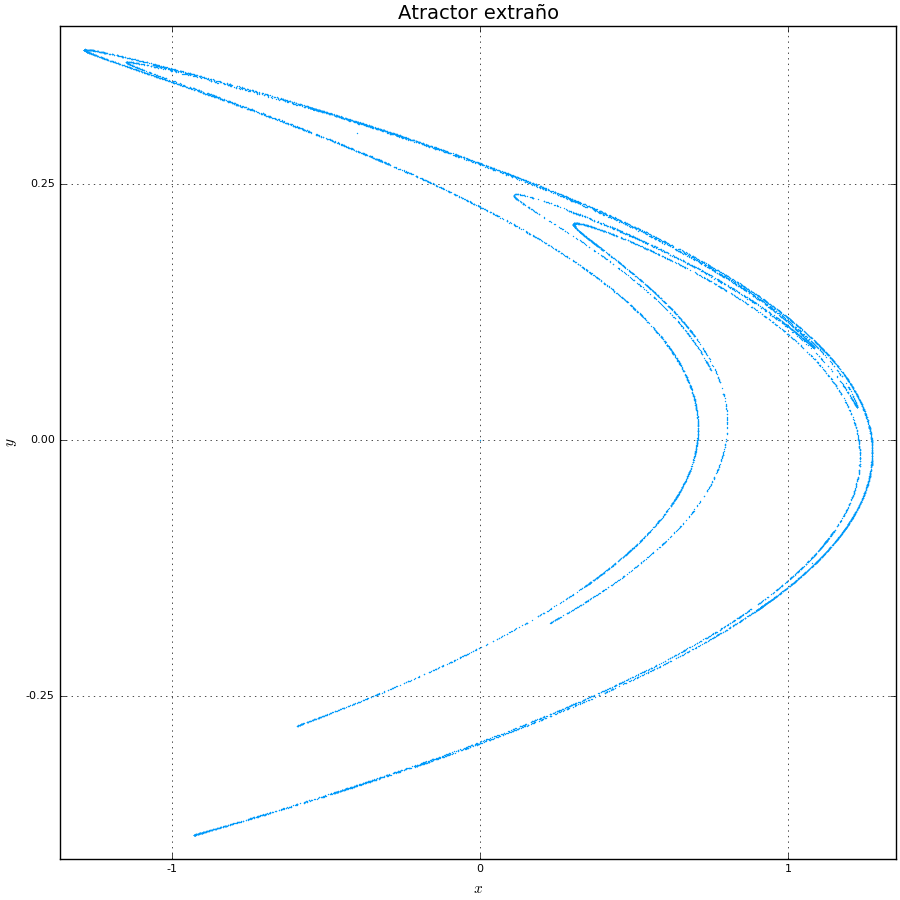

In [21]:
scatter(xx,yy,ms=1,markerstrokecolor=false,label="",size=(900,900))
xlabel!(L"x")
ylabel!(L"y")
title!("Atractor extraño")

Resulta ser que esta figura es un atractor extraño que de acuerdo a lo descrito en el artículo de Hénon [1], es el producto de una línea en el plano $XY$  y un conjunto de Cantor. También el atractor extraño es una *órbita aperiódica*.

Aunque los puntos fijos son puntos fijos inestables, éstos repelen a los iterados del mapeo de tal forma que se crea el atractor extraño mostrado en la figura. Esto sugiere que algunas condiciones iniciales "convergen al atractor" pero debe haber otra para las cuales esto no pasa.

Utilicemos la técnica con la que pintamos los conjutos de Julia en la tarea 2 ([véase este notebook](https://github.com/lbenet/2017-1_TSFisComp/blob/master/tareas/Oscar%20Hurtado/Tarea%202.ipynb)), para ver que condiciones iniciales se van al atractor y cuales divergen.


In [52]:
"""Funcion que grafica el conjunto de Julia generado por el mapeo f(z,c), en donde z 
es la variable en el plano complejo y c el parametro que caracteriza al 
sistema dinamico z_{n+1}=f(z_n)

init_cond =  la malla de condiciones iniciales en el plano complejo 

m =  numero limite de iteraciones del mapeo

R= radio del circulo en el plano complejo que se toma como criterio de divergencia

"""
function Julia_set_Henon(a,b,xrange,yrange,maxiter,R)
    
    mx=length(xrange)
    my=length(yrange)
    iterandos=zeros(my,mx) 
    for i in 1:mx
        for j in 1:my
            x=xrange[i]
            y=yrange[my+1-j]
                for k in 1:maxiter
                x,y=Henon_map(x,y,a,b)
                iterandos[j,i]=k
                    if 
                    sqrt(x^2+y^2)>=R 
                    break
                    end 
                end
        end 
    end
    return iterandos
end

Julia_set_Henon (generic function with 1 method)

In [32]:
using PyPlot;

In [132]:
xrange=-2:1/100:2
yrange=-3:1/100:5
m=80
R=2
a=1.4
b=1

1

In [19]:
length(5:-1/100:3)

201

In [133]:
Ima=Julia_set_Henon(a,b,xrange,yrange,m,R);

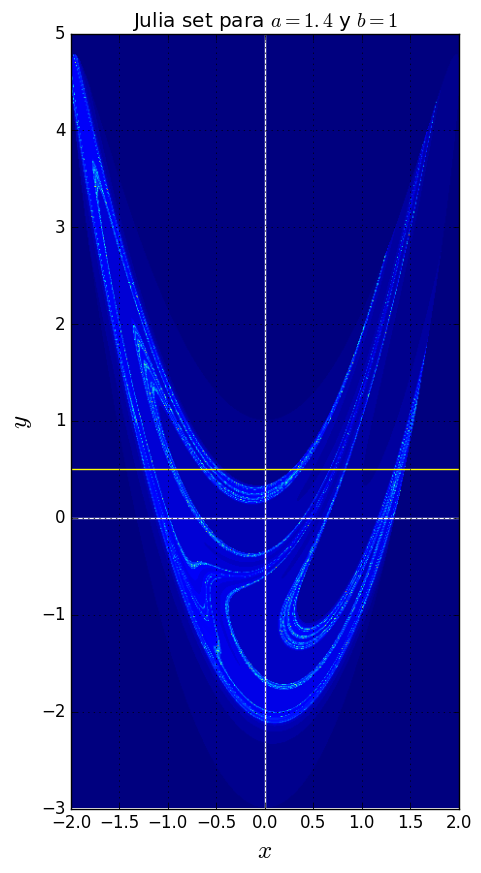

In [149]:
figure(figsize=(5,10))
imshow(Ima,extent=[xrange[1],xrange[end] ,yrange[1], yrange[end]])
plot([xrange[1],xrange[end]],[0.5,0.5],"-",color=:yellow)
plot([0,0],[yrange[1],yrange[end]],"-",color=:white)
plot([xrange[1],xrange[end]],[0,0],"-",color=:white)
title(L"Julia set para $a=1.4$ y $b=1$")
xlabel(L"x",size=18)
ylabel(L"y",size=18)
grid("on")

In [94]:
xrange=-2:1/100:2
yrange=-3:1/100:5
m=80
R=2
a=1.4
b=0.3
Ima=Julia_set_Henon(a,b,xrange,yrange,m,R);

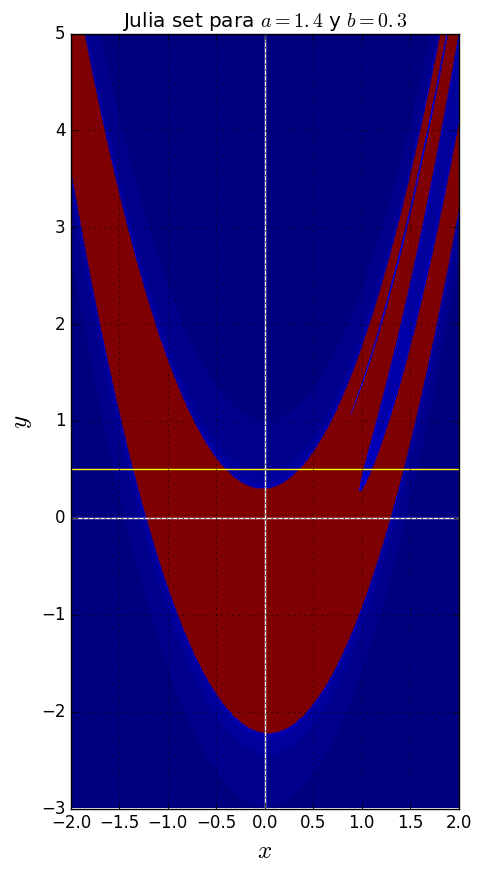

In [95]:
figure(figsize=(5,10))
imshow(Ima,extent=[xrange[1],xrange[end] ,yrange[1], yrange[end]])
plot([xrange[1],xrange[end]],[0.5,0.5],"-",color=:yellow)
plot([0,0],[yrange[1],yrange[end]],"-",color=:white)
plot([xrange[1],xrange[end]],[0,0],"-",color=:white)
title(L"Julia set para $a=1.4$ y $b=0.3$")
xlabel(L"x",size=18)
ylabel(L"y",size=18)
grid("on")

In [119]:
xorb,yorb=iter_Henon(10000*rand(),10000*rand(),a,b,2000)

([5974.85,-3.49691e15,-1.71197e31,-4.10317e62,-2.35704e125,-7.77792e250,-Inf,-Inf,-Inf,-Inf  …  -Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf],[410.134,-4.99779e7,-3.49691e15,-1.71197e31,-4.10317e62,-2.35704e125,-7.77792e250,-Inf,-Inf,-Inf  …  -Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf])

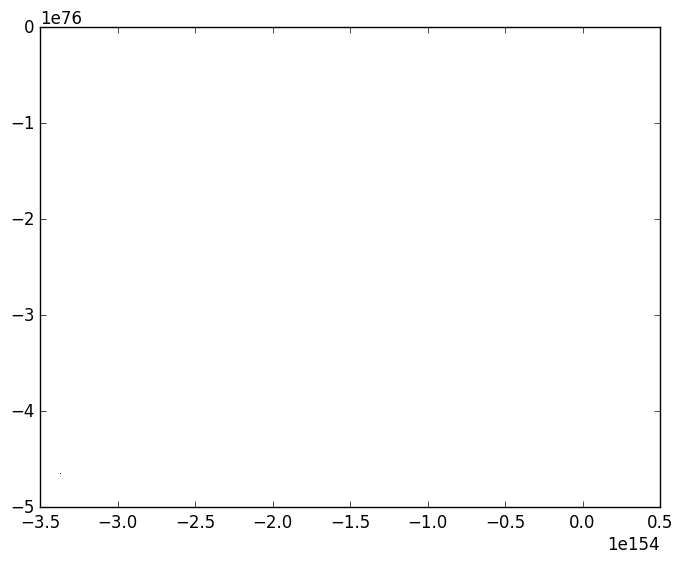

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3291fc310>

In [93]:
plot(xorb,yorb,",")


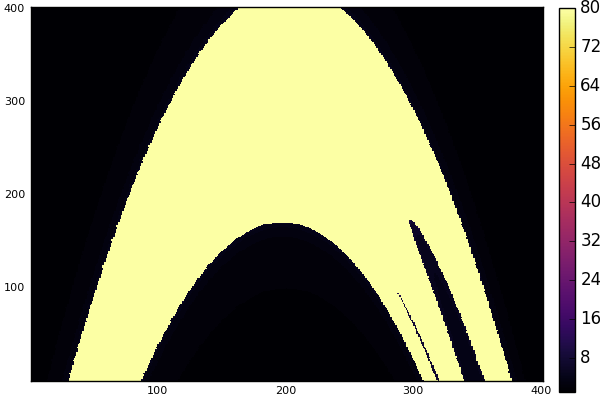

In [25]:
heatmap(Ima)

In [45]:
iter_Henon(0, 0.3, a, b, 20) 

([0.0,-1.366,-1.22234,-1.50156,-2.52324,-8.36389,-97.6936,-13363.2,-2.50003e8,-8.75023e16  …  -1.60866e68,-3.62288e136,-1.83754e273,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf],[0.3,0.39,-0.4098,-0.366702,-0.450467,-0.756972,-2.50917,-29.3081,-4008.95,-7.5001e7  …  -3.2158e33,-4.82597e67,-1.08686e136,-5.51261e272,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf])

In [48]:
Arange=-2:1/2^8:1.55

-2.0:0.00390625:1.546875

In [38]:
M=100000
Nlast=250
x0=0.1
y0=0.1
b=0.3

0.3

In [49]:
as,xbif,ybif=Bif_diag(Arange, M, x0, y0, b, Nlast) ; #revisar la funcion Bif diag para hacerla 
#mas rapida

([-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0  …  1.54688,1.54688,1.54688,1.54688,1.54688,1.54688,1.54688,1.54688,1.54688,1.54688],[Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf  …  -Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf],[Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf  …  -Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf])

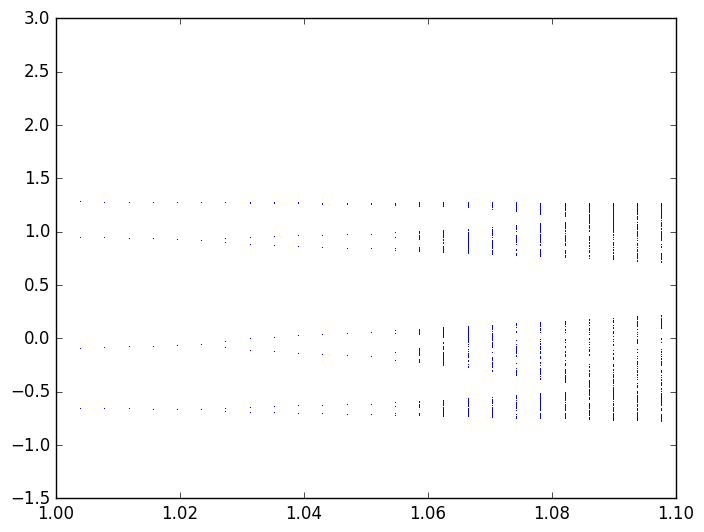

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32527d4d0>
 PyObject <matplotlib.lines.Line2D object at 0x32527d550>

In [93]:
plot(as,xbif,",b",xlim(1,1.1))


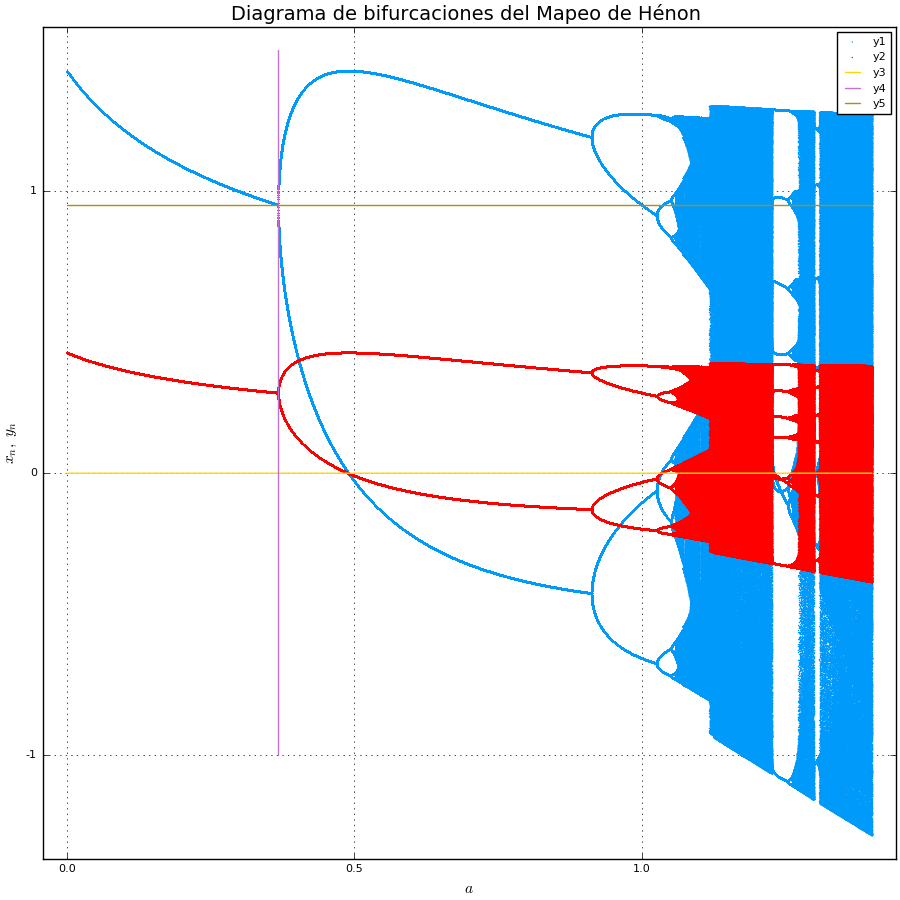

In [282]:
scatter(as,xbif, markersize=1,markerstrokecolor=false,size=(900,900))#,xlim=(1,1.1))
scatter!(as,ybif,markersize=1,markerstrokecolor=false,color=:red)
plot!(as,zeros(length(as)),c=:gold,xlim=(0.367,0.368))
#(0.36597228673036497,0.366084517823527)
#(0.36735732327485593,0.3673686471347857)
plot!([0.3673686471347857,0.3673686471347857],[-1,1.5])
plot!([0,1.4],[0.952473, 0.952473])
xlabel!(L"a")
ylabel!(L"x_n, \ y_n")
title!("Diagrama de bifurcaciones del Mapeo de Hénon ")


In [263]:
"""esta función calcula la longitud de la orbita solamente en las X de la iteración del 
mapeo de Hénon a partir de una condición inicial (x0,y0) y dos parámetros (a,b). La función 
itera Norb veces la condición inicial y a partir de ahí ve los valores distintos 
de las x_{n+i} para determinar la longitud de la orbita en as X.
"""
function orbit_lengthX(x0,y0,a,b,Norb)
    HenAB(x,y)=Henon_map(x,y,a,b)
    x=x0
    y=y0
    tol=1e-8
    cont=1
    for i in 1:Norb
        x,y=HenAB(x,y)
    end 
    xf=x
    yf=y
    xorbit,yorbit=HenAB(xf,yf)
    while abs(xf-xorbit)>tol
        cont=cont+1
        #xf=xorbit
        xorbit,yorbit=HenAB(xorbit,yorbit)   
        if cont>10*1024+1
            #println("numero de iterados insuficiente")
            break
        end 
    end 
    return cont
end 
      

orbit_lengthX (generic function with 2 methods)

In [269]:
b=0.3
a=0.3674
orb=500000
orbit_lengthX(0,0,a,b,Norb)

1

In [270]:
xx,yy=iter_Henon(0,0, a, b, Norb)

([0.0,0.6326,1.15297,0.701378,1.16516,0.711635,1.16349,0.716141,1.16062,0.719938  …  0.952446,0.952446,0.952446,0.952446,0.952446,0.952446,0.952446,0.952446,0.952446,0.952446],[0.0,0.3,0.18978,0.345892,0.210413,0.349547,0.213491,0.349046,0.214842,0.348187  …  0.285734,0.285734,0.285734,0.285734,0.285734,0.285734,0.285734,0.285734,0.285734,0.285734])

In [271]:
xx

500001-element Array{Float64,1}:
 0.0     
 0.6326  
 1.15297 
 0.701378
 1.16516 
 0.711635
 1.16349 
 0.716141
 1.16062 
 0.719938
 1.15776 
 0.723516
 1.155   
 ⋮       
 0.952446
 0.952446
 0.952446
 0.952446
 0.952446
 0.952446
 0.952446
 0.952446
 0.952446
 0.952446
 0.952446
 0.952446

In [265]:
xx[end-30]

0.9524733864226376

In [257]:
abs(xx[end]-xx[end-1])

2.1100898806025725e-12

In [148]:
orbit_lengthY(0,0,a,b,10000)

4

In [147]:
"""esta función calcula la longitud de la orbita solamente en las Y de la iteración del 
mapeo de Hénon a partir de una condición inicial (x0,y0) y dos parámetros (a,b). La función 
itera Norb veces la condición inicial y a partir de ahí ve los valores distintos 
de las y_{n+i} para determinar la longitud de la orbita en as Y.
"""
function orbit_lengthY(x0,y0,a,b,Norb)
    HenAB(x,y)=Henon_map(x,y,a,b)
    x=x0
    y=y0
    tol=1e-8
    cont=1
    for i in 1:Norb
        x,y=HenAB(x,y)
    end 
    xf=x
    yf=y
    xorbit,yorbit=HenAB(xf,yf)
    while abs(yf-yorbit)>tol
        cont=cont+1
        xorbit,yorbit=HenAB(xorbit,yorbit)   
        if cont>6*1024+1
            #println("numero de iterados insuficiente")
            break
        end 
    end 
    return cont
end 
      

orbit_lengthY (generic function with 2 methods)

In [179]:
"""esta función calcula las longitudes de las orbitas en las X's y en las Y's de la iteración 
del mapeo de Hénon a partir de una condición inicial (x0,y0) y dos parámetros (a,b). La función 
itera Norb veces la condición inicial y a partir de ahí ve los valores distintos 
de las x_{Norb+i} y als y_{Norb+i} para determinar la longitud de la orbita en las X y en las Y
"""
function orbit_lengthXY(x0,y0,a,b,Norb)
    HenAB(x,y)=Henon_map(x,y,a,b)
    x=x0
    y=y0
    tol=1e-8
    contX=1
    contY=1
    for i in 1:Norb
        x,y=HenAB(x,y)
    end 
    xf=x
    yf=y
    xorbit,yorbit=HenAB(xf,yf)
    while abs(xf-xorbit)>tol
        contX=contX+1
        xorbit,yorbit=HenAB(xorbit,yorbit)   
        if contX>10*1024+1
            #println("numero de iterados insuficiente")
            break
        end 
    end 
    
    xorbit,yorbit=HenAB(xf,yf)
    
    while abs(yf-yorbit)>tol
        contY=contY+1
        xorbit,yorbit=HenAB(xorbit,yorbit)   
        if contY>10*1024+1
            #println("numero de iterados insuficiente")
            break
        end 
    end 
    
    
    return contX,contY
end 
      

orbit_lengthXY (generic function with 1 method)

In [248]:
x0=0
y0=0
b=0.3
a=0.3673573522874076
Norb=100000
orbX,orbY=orbit_lengthXY(x0, y0, a, b, Norb) 

(1,1)

In [213]:
"""funcion que determina (si es que existe) el punto de bifurcación (en la variable x o en la 
variable y) del mapeo de Henon.
entre dos valores de parámetro a1 y a2 con Norb iteraciones a partir de la condicion inicial
(x0,y0)
En caso de existir bifurcación, la función devuelve el valor del parámetro 
'Ab' en donde se presenta la bifurcación
NOTA: Funciona mejor con Norb>1000000"""

function point_bif(x0,y0,a1,a2,Norb)
     tol=1e-14
    L1x,L1y=orbit_lengthXY(x0, y0, a1, b, Norb)
    L2x,L2y=orbit_lengthXY(x0, y0, a2, b, Norb)
    c1=a1
    c2=a2
        if (L1x-L2x)==0 #para las X's
            nothing
        else
             while abs(c1-c2)>tol
            cmed=(c1+c2)/2
            LmedX,LmedY=orbit_lengthXY(x0, y0, cmed, b, Norb) 
        if LmedX==L1x
            c1=cmed
                L1x,L1y=orbit_lengthXY(x0, y0, c1, b, Norb) 
        else LmedX==L2x
            c2=cmed
                L2x,L2y=orbit_lengthXY(x0,y0,c2,b,Norb)
        end  
        end
    end 
    cbX=(c1+c2)/2
    
    
    L1x,L1y=orbit_lengthXY(x0, y0, a1, b, Norb)
    L2x,L2y=orbit_lengthXY(x0, y0, a2, b, Norb)
    c1=a1
    c2=a2
    if (L1y-L2y)==0 #para las Y's
            nothing
        else
             while abs(c1-c2)>tol
            cmed=(c1+c2)/2
            LmedX,LmedY=orbit_lengthXY(x0, y0, cmed, b, Norb) 
            if LmedY==L1y
            c1=cmed
                L1x,L1y=orbit_lengthXY(x0, y0, c1, b, Norb) 
                else LmedY==L2y
            c2=cmed
                L2x,L2y=orbit_lengthXY(x0,y0,c2,b,Norb)
        end  
        end
    end 
    cbY=(c1+c2)/2
    return cbX,cbY
    
end 

point_bif (generic function with 1 method)

In [244]:
a1=0.36
a2=0.3674868088693479
Norb=100000

100000

In [245]:
@time point_bif(x0, y0, a1, a2, Norb) 

  5.686187 seconds (82.29 M allocations: 1.961 GB, 13.74% gc time)


(0.3673573522874076,0.36736867394211875)

In [241]:
x0=0
y0=0
b=0.3
a=0.3674979
Norb=10000000
orbX,orbY=orbit_lengthXY(x0, y0, a, b, Norb) 

(1,1)

In [215]:
"""Función que calcula los parámetros de Feigenbaum con los puntos superestables dados 
en un arreglo cs"""
function fn_ratio(cn)
    fn=Float64[]
    for i in 1:length(cn)-2
        ratio=(cn[i]-cn[i+1])/(cn[i+1]-cn[i+2])
        push!(fn,ratio)
    end 
    return fn
end


fn_ratio (generic function with 1 method)

100000

In [89]:
x0=0
y0=0
a=1.5
b=0.3
N=100000
xx,yy=iter_Henon(x0, y0, a, b, N);

In [90]:
yy

100001-element Array{Float64,1}:
    0.0       
    0.3       
   -0.15      
    0.2775    
   -0.130031  
    0.298709  
   -0.185146  
    0.218218  
    0.00636089
    0.365263  
   -0.365177  
   -0.257193  
   -0.140296  
    ⋮         
 -Inf         
 -Inf         
 -Inf         
 -Inf         
 -Inf         
 -Inf         
 -Inf         
 -Inf         
 -Inf         
 -Inf         
 -Inf         
 -Inf         

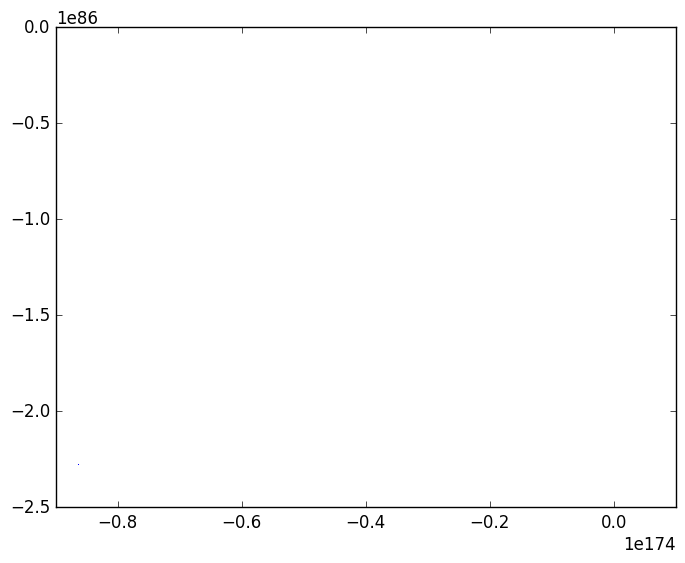

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x320ba0f10>

In [91]:

plot(xx,yy,",b")

In [81]:
scatter(cs,diagBif, markersize=0.05, xaxis=(L"c"), 
ylabel=L"x",title=(L"Diagrama de bifurcaciones de $f(x,c) = x^2 + c$"),size=(900,900))
plot!(ces,zeros(length(ces)),c=:gold)
xlabel!(L"c")
ylabel!(L"x_n")


LoadError: LoadError: UndefVarError: cs not defined
while loading In[81], in expression starting on line 1